<h1><center><center><h1><h1><center><span style="color:#ba2ec7">Machine Learning Model Building
</span><center><h1>

## Ok... previouslly we said we will use Pipeline 2 to data processing steps

### Now we are going to build the model based on this data processing, these steps is found in `Pipeline.py`

## I will import this file here :

In [1]:
import Pipelines
Pipelines

<module 'Pipelines' from 'C:\\Users\\ahmed_nlhvcl\\my_tasks\\Wind Turbine\\Pipelines.py'>

## Import Mytest file (for assertions)

In [2]:
import Test
Test

<module 'Test' from 'C:\\Users\\ahmed_nlhvcl\\my_tasks\\Wind Turbine\\Test.py'>

# My Librabies :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (ExtraTreesRegressor, RandomForestRegressor, VotingRegressor
                              , HistGradientBoostingRegressor, BaggingRegressor, GradientBoostingRegressor)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Remove Warning :

In [4]:
import warnings
warnings.simplefilter("ignore")

# Datasets : 

In [5]:
X_train = pd.read_csv('Dataset/xtrain_data.csv')
y_train = pd.read_csv('Dataset/ytrain_data.csv')
X_test = pd.read_csv('Dataset/xtest_data.csv')
y_test = pd.read_csv('Dataset/ytest_data.csv')

ds = Test.DataChecker(X_train, y_train, X_test, y_test)
ds.check_shapes()
ds.check_negative_values_y()

### Making all data processing steps on the `X_train`,`y_train`,`X_test` and `y_test` data

In [6]:
from Pipelines import FullPipeline2

full_pipeline = FullPipeline2()
X_train, y_train = full_pipeline.fit_transform(X_train, y_train)
X_test, y_test = full_pipeline.transform(X_test, y_test)

ds = Test.DataChecker(X_train, y_train, X_test, y_test)
ds.check_shapes()
ds.check_negative_values_y()
ds.check_nan_values_X()

### The Pipeline :

In [7]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline.x_pipeline

Pipeline(steps=[('selector',
                 ColumnSelector(columns=['Date/Time', 'Wind Speed (m/s)',
                                         'Theoretical_Power_Curve (KWh)',
                                         'Wind Direction (°)'])),
                ('imputer',
                 DataFrameImputer(freq_cols=['Date/Time'],
                                  median_cols=['Wind Speed (m/s)',
                                               'Theoretical_Power_Curve (KWh)',
                                               'Wind Direction (°)'])),
                ('DateTime',
                 DateTimeTransformer(column='Date/Time',
                                     date_format='%d %m %Y %H:%M',
                                     drop_original=True)),
                ('drop_cols', DropColumnsTransformer(columns=['year'])),
                ('scale',
                 StandardScaleTransform(columns=['Wind Speed (m/s)',
                                                 'Theoretical_Power_Curve '
                                                 '(KWh)',
                                                 'Wind Direction (°)', 'day',
                                                 'month']))])

## Data Now :

In [8]:
X_train.head()

,Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),day,month
0,0.246505,0.581455,-0.722085,0.512080,0.694710
1,-0.363022,-0.477155,-0.502179,-0.758973,-0.794818
2,-0.324021,-0.419330,-0.969367,-0.296772,0.098899
3,-0.226430,-0.266647,-0.602218,0.165429,0.992615
4,-1.321573,-1.331885,-0.724476,1.667583,0.098899


In [9]:
y_train.head()

,LV ActivePower (kW)
0,2150.357910
1,997.176025
2,1266.180054
3,1348.394043
4,56.415901


### For visualizing errors :

In [10]:
from MachineLearning import RegressionPlot

## Everything is fine let's go for the model :)

### As stated before our model works well on ensamble learning algorithms... so let's use them here

<br><br><br><br>

### Ok... I will use `Mean Absolute Error` to evaluate the model... <br><br>to know how much years does my model deviates from what should be predicted

## Ok Let's go and see some models : <br><br><br><br>

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#ba2ec7' size=6>Random Forest :<font><h1>

In [11]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

train_score = rf.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = rf.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 27.553646936781256
MAE on cross-validation set: 76.4382291669966
MAE on test set: 71.95089593647171


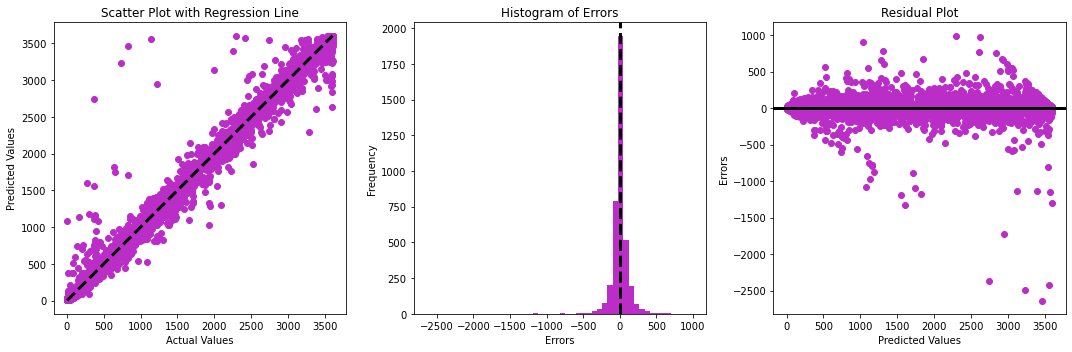

In [12]:
plot = RegressionPlot(y_test, y_pred, color='#ba2ec7')
plot.plot()

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#ba2ec7' size=6>Hist Gradient Boosting :<font><h1>

In [13]:
hist_gb = HistGradientBoostingRegressor()
hist_gb.fit(X_train, y_train)

train_score = hist_gb.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(hist_gb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = hist_gb.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 66.9441340294677
MAE on cross-validation set: 71.96033004256077
MAE on test set: 68.21247316425914


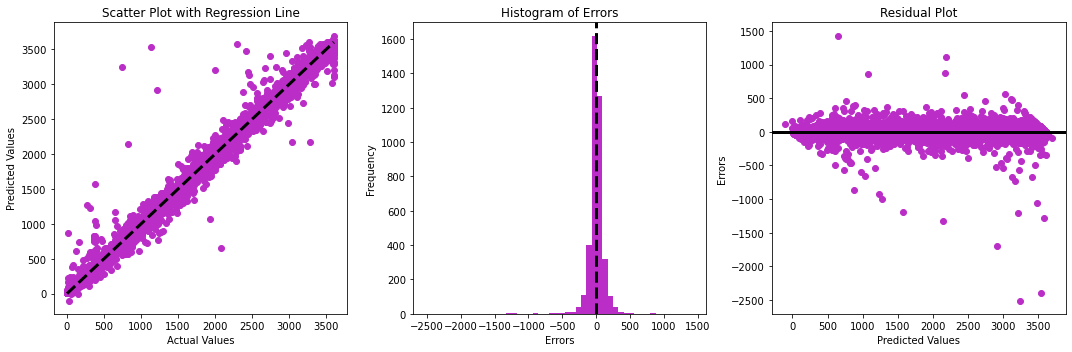

In [14]:
plot = RegressionPlot(y_test, y_pred, color='#ba2ec7')
plot.plot()

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#ba2ec7' size=6>LGBM Regressor :<font><h1>

In [15]:
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

train_score = lgbm.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = lgbm.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 66.42674999207155
MAE on cross-validation set: 71.64943390077293
MAE on test set: 68.50996409378985


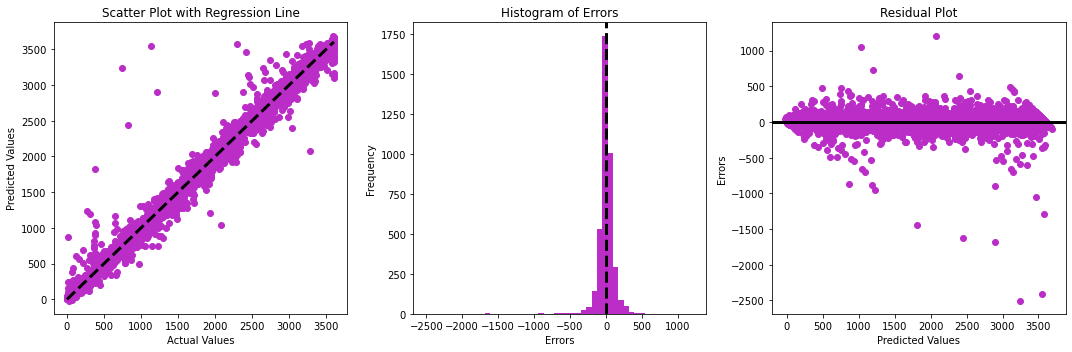

In [16]:
plot = RegressionPlot(y_test, y_pred, color='#ba2ec7')
plot.plot()

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#ba2ec7' size=6>KNeighborsRegressor :<font><h1>

In [17]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

train_score = knn.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = knn.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 52.923253934463624
MAE on cross-validation set: 69.50035539873264
MAE on test set: 66.97714620343503


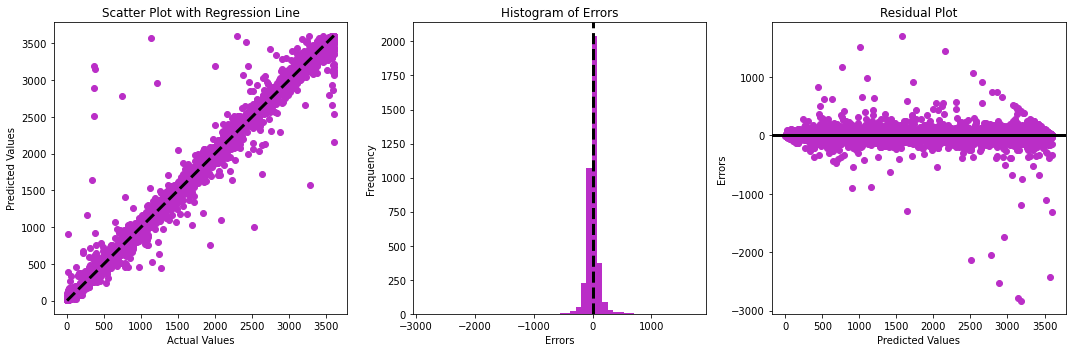

In [18]:
plot = RegressionPlot(y_test, np.array(y_pred).reshape(-1), color='#ba2ec7')
plot.plot()

<b><hr style="border-top: 4px solid black;"/></b>

<h1><Font color='#ba2ec7' size=6>Voting Regressor :</font></h1>
<h5>Using (KNN, LGBM, HistGradientBoostingRegressor)<h5>

In [19]:
lgbm = LGBMRegressor()
knn = KNeighborsRegressor()
hgb = HistGradientBoostingRegressor()

voting_regressor = VotingRegressor(estimators=[('lgbm', lgbm), ('knn', knn), ('hgb', hgb)])
voting_regressor.fit(X_train, y_train)

train_score = voting_regressor.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(voting_regressor, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = voting_regressor.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 57.38494235999204
MAE on cross-validation set: 65.47283718396629
MAE on test set: 63.02532614088591


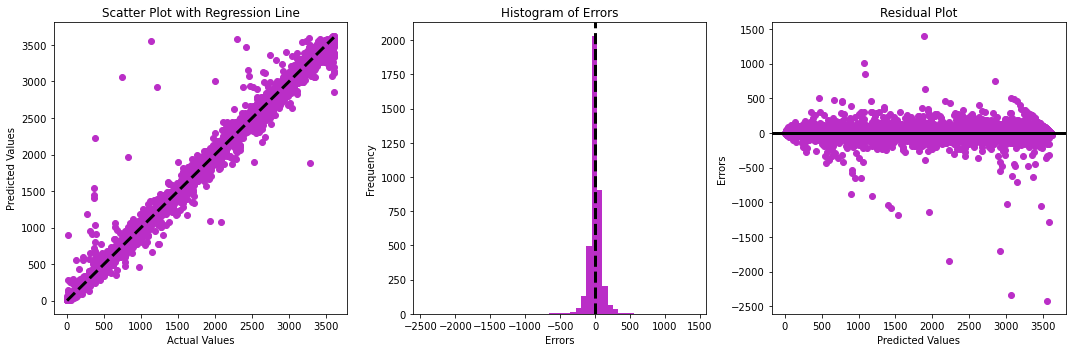

In [20]:
plot = RegressionPlot(y_test, y_pred, color='#ba2ec7')
plot.plot()

<b><hr style="border-top: 4px solid black;"/></b>

<br><br>

## Ok Best model goes `Voting Regressor`, Let's tune it

In [21]:
lgbm = LGBMRegressor()
knn = KNeighborsRegressor()
hgb = HistGradientBoostingRegressor()

voting_regressor = VotingRegressor(estimators=[('lgbm', lgbm), ('knn', knn), ('hgb', hgb)])

param_grid = {
    'lgbm__num_leaves': [180, 210],
    'knn__n_neighbors': [3, 5],
    'hgb__learning_rate': [0.2, 0.3],
    'hgb__max_iter': [100,120],
    'lgbm__learning_rate': [0.3,0.4],
    'knn__leaf_size': [30, 60],
}

grid_search = GridSearchCV(estimator=voting_regressor, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'hgb__learning_rate': 0.2,
 'hgb__max_iter': 120,
 'knn__leaf_size': 30,
 'knn__n_neighbors': 5,
 'lgbm__learning_rate': 0.3,
 'lgbm__num_leaves': 210}

In [22]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9874772932413085 {'hgb__learning_rate': 0.2, 'hgb__max_iter': 100, 'knn__leaf_size': 30, 'knn__n_neighbors': 3, 'lgbm__learning_rate': 0.3, 'lgbm__num_leaves': 180}
0.9873711513696488 {'hgb__learning_rate': 0.2, 'hgb__max_iter': 100, 'knn__leaf_size': 30, 'knn__n_neighbors': 3, 'lgbm__learning_rate': 0.3, 'lgbm__num_leaves': 210}
0.9872840516062921 {'hgb__learning_rate': 0.2, 'hgb__max_iter': 100, 'knn__leaf_size': 30, 'knn__n_neighbors': 3, 'lgbm__learning_rate': 0.4, 'lgbm__num_leaves': 180}
0.9872608386717916 {'hgb__learning_rate': 0.2, 'hgb__max_iter': 100, 'knn__leaf_size': 30, 'knn__n_neighbors': 3, 'lgbm__learning_rate': 0.4, 'lgbm__num_leaves': 210}
0.9875106260154578 {'hgb__learning_rate': 0.2, 'hgb__max_iter': 100, 'knn__leaf_size': 30, 'knn__n_neighbors': 5, 'lgbm__learning_rate': 0.3, 'lgbm__num_leaves': 180}
0.9874831492062601 {'hgb__learning_rate': 0.2, 'hgb__max_iter': 100, 'knn__leaf_size': 30, 'knn__n_neighbors': 5, 'lgbm__learning_rate': 0.3, 'lgbm__num_leaves': 210

In [23]:
lgbm = LGBMRegressor(num_leaves=210, learning_rate=0.3, reg_alpha=0.2)
knn = KNeighborsRegressor(n_neighbors=3, leaf_size=60)
hgb = HistGradientBoostingRegressor(learning_rate=0.3, max_iter=100, min_samples_leaf=25)

voting_regressor_tuned = VotingRegressor(estimators=[('lgbm', lgbm), ('knn', knn), ('hgb', hgb)])
voting_regressor_tuned.fit(X_train, y_train)

train_score = voting_regressor_tuned.predict(X_train)
print("MAE on training set:", mean_absolute_error(y_train, train_score))

cv_scores = cross_val_score(voting_regressor_tuned, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -1 * cv_scores.mean()
print("MAE on cross-validation set:", cv_mae)

y_pred = voting_regressor_tuned.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
print("MAE on test set:", test_mae)

MAE on training set: 43.30518456399637
MAE on cross-validation set: 61.707992080495515
MAE on test set: 58.287751335669874


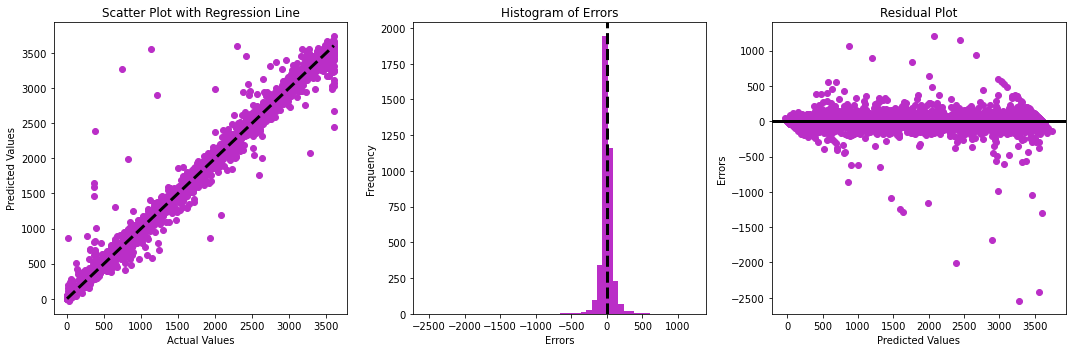

In [24]:
plot = RegressionPlot(y_test, y_pred, color='#ba2ec7')
plot.plot()

<br><br><br>

# Final Predictions :

In [25]:
final_predictions = y_test.copy()
final_predictions['predicted'] = y_pred
final_predictions.columns = ['actual','predicted']
final_predictions = final_predictions.sample(300)

final_predictions.head()

,actual,predicted
861,3603.059082,3601.820612
118,45.140610,81.329777
437,3483.115967,3568.948857
2183,281.946014,243.607673
3477,421.965302,437.271975


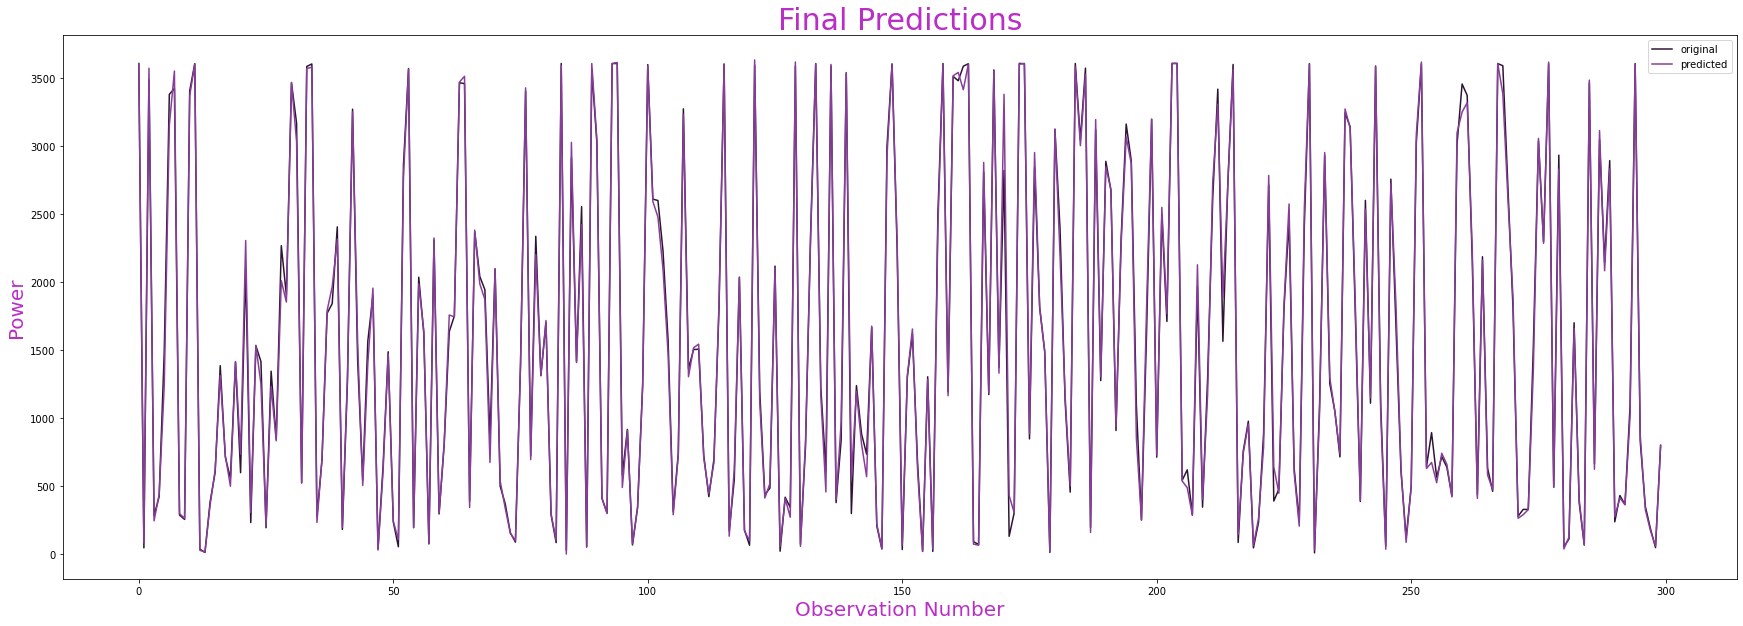

In [26]:
from EDA import ColorPalette

cp = ColorPalette(hue=0.8,value_start=0.2,saturation=0.6)
palette = cp.create_sequential_palette(num_colors=2)

number_of_observations = 300

x_ax = range(len(final_predictions[:number_of_observations]))

plt.figure(figsize=(30, 10))
plt.plot(x_ax, final_predictions['actual'][:number_of_observations], label="original", color=palette[0])
plt.plot(x_ax, final_predictions['predicted'][:number_of_observations], label="predicted", color=palette[1])

plt.title("Final Predictions", size=30, color='#ba2ec7')
plt.xlabel('Observation Number', size=20, color='#ba2ec7')
plt.ylabel('Power', size=20, color='#ba2ec7')
plt.legend()

plt.show()

### Ok now much better :)

### Now the best model is for the tuned extra trees.... and there is still place to decrease the variance again and build better model... I may try to do this later

### Let's save this model :

In [27]:
import joblib

joblib.dump(voting_regressor_tuned, 'Tuned_Voting_Regressor.pkl')

['Tuned_Voting_Regressor.pkl']

# Now this Model is saved and ready to be reloaded again :)

# Finally this is the End